<a href="https://colab.research.google.com/github/chepkemoi93/credit_scoring/blob/main/Uwezo_Fund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **1.   DATA PREPARATION**




**Libraries**

In [1]:
#import Standard libraries
import pandas as pd
from numpy import asarray
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer



**Raw** **Data**  **Uwezo** **Fund**

In [2]:
#Read dataset to pandas dataframe
dataset= pd.read_excel("uwezofund.xlsx")

In [3]:
#see what's inside dataset
dataset.head()

,S/NO,Date_of_Issue,Group_Name,GFS_Code,Group_Age_In_Years,Group_Location,Sector,Category,Amount_Applied,P_Voucher,...,Repayment_Period_In_Years,Existing_Loans,Table_Banking,Amount_Issued,Amount_Due (KShs),Amount_Repaid (KShs),Amount_cummulatively_in_arrears (KShs),Outstanding_Loan_Balance (KShs),Date_of_Repayment _Completion,Remarks
0,53,2014-08-12 00:00:00,Ilkinyiaku Y.G.,4-033-179-4110201-401-001,9.0,179.0,Agriculture,Youth,50000,1-103-0140-03-4110201-1,...,2.0,Yes,No,50000.0,4166.666667,0.0,4166.666667,50000.0,2017-08-06 00:00:00,NaN
1,54,2014-08-12 00:00:00,Illanyuak Dapash,4-033-179-4110201-401-002,9.0,179.0,Agriculture,Youth,150000,“ “,...,2.0,Yes,Yes,150000.0,12500.000000,12500.0,0.000000,137500.0,2017-08-06 00:00:00,NaN
2,55,2014-08-12 00:00:00,Illaramatak Nkokolani Y.G.,4-033-179-4110201-401-003,9.0,179.0,Agriculture,Youth,50000,“ “,...,2.0,Yes,Yes,50000.0,4166.666667,27045.0,-22878.333333,22955.0,2017-08-06 00:00:00,NaN
3,56,2014-08-12 00:00:00,Olpusimoru Pamoja W.G,4-033-179-4110202-402-004,9.0,179.0,Agriculture,Women,100000,“ “,...,2.0,Yes,No,100000.0,8333.333333,0.0,8333.333333,100000.0,2017-08-06 00:00:00,NaN
4,57,2014-08-12 00:00:00,Ilariak Y.G.,4-033-179-4110201-401-005,9.0,179.0,Agriculture,Youth,150000,“ “,...,2.0,Yes,Yes,150000.0,12500.000000,6250.0,6250.000000,143750.0,2017-08-06 00:00:00,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   S/NO                                    1021 non-null   int64  
 1   Date_of_Issue                           1020 non-null   object 
 2   Group_Name                              1021 non-null   object 
 3   GFS_Code                                1020 non-null   object 
 4   Group_Age_In_Years                      1019 non-null   float64
 5   Group_Location                          1020 non-null   float64
 6   Sector                                  1020 non-null   object 
 7   Category                                1021 non-null   object 
 8   Amount_Applied                          1021 non-null   object 
 9   P_Voucher                               1018 non-null   object 
 10  Cheque_No                               1020 non-null   floa

**Columns description of the raw data:**


1.  **S/NO**: This feature shows the numberof the group as captured in excel

2.   **Date_of_Issue**:This feature indicates the date which loan was issued to a group

3. **Group_Name**:This feature is the name of the group

4. **GFS_Code**:

5. **Group_Age_In_Years**: This feature represents the age of the group

6. **Group_Location**: This feature indicates where the group is based

7.  **Sector**: This feature indicates the group's activity or the purpose for the loan

8. **Category**: This feature presents the composition of the group/membership profile

9. **Amount_Applied**: This is the amount applied by the group. might be equal or less the amount issued.

10.  **P_Voucher**:

11. **Cheque_No**:

12. **Repayment_Period_In_Months**: show the duration or term of the loan  

13. **Table_Banking**: shows whether the group operates table banking

14. **Amount_Issued**: It indicates the monetary value of the loan.

15. **Amount_Due (KShs)**:It represents the amount not yet  paid

16. **Amount_Repaid (KShs)**:It represents the amount already repaid by the group

17. **Amount_cummulatively_in_arrears (KShs)**

18. **Outstanding_Loan_Balance (KShs)**

19. **Date_of_Repayment _Completion**: The expected date of loan repayment.

20. **Remarks**: this represents the recommendation from the officer in charge





 **Data Cleaning**

This step involves understanding the data by inspecting its structure and identifying missing values, outliers, and inconsistencies.

In [7]:
#check and Count for missing values
dataset.isnull().sum()

S/NO                                        0
Date_of_Issue                               1
Group_Name                                  0
GFS_Code                                    1
Group_Age_In_Years                          2
Group_Location                              1
Sector                                      1
Category                                    0
Amount_Applied                              0
P_Voucher                                   3
Cheque_No                                   1
Repayment_Period_In_Years                  31
Existing_Loans                              0
Table_Banking                               0
Amount_Issued                               1
Amount_Due (KShs)                          31
Amount_Repaid (KShs)                        8
Amount_cummulatively_in_arrears (KShs)     29
Outstanding_Loan_Balance (KShs)             8
Date_of_Repayment _Completion              17
Remarks                                   627
dtype: int64

The dataset has a number of missing values.







In [8]:
#dataset overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   S/NO                                    1021 non-null   int64  
 1   Date_of_Issue                           1020 non-null   object 
 2   Group_Name                              1021 non-null   object 
 3   GFS_Code                                1020 non-null   object 
 4   Group_Age_In_Years                      1019 non-null   float64
 5   Group_Location                          1020 non-null   float64
 6   Sector                                  1020 non-null   object 
 7   Category                                1021 non-null   object 
 8   Amount_Applied                          1021 non-null   object 
 9   P_Voucher                               1018 non-null   object 
 10  Cheque_No                               1020 non-null   floa

 From the above dataset info,

We can see that Group_Age,Sector, Repayment_period, Amount_Due, Amount cummulatively_in_arrears, Date_of_Repayment_Completion and Remarks have an unequal number of counts and some of the columns are categorical and have data type objects and some are integer and float values.




**Descriptive** **structure** **of** **the** **data** **using** **dataset**.**describe**()

In [9]:
dataset.describe()

,S/NO,Group_Age_In_Years,Group_Location,Cheque_No,Repayment_Period_In_Years,Amount_Issued,Amount_Due (KShs),Amount_Repaid (KShs),Amount_cummulatively_in_arrears (KShs),Outstanding_Loan_Balance (KShs)
count,1021.000000,1019.000000,1020.000000,1020.000000,990.000000,1020.000000,990.000000,1013.000000,992.000000,1013.000000
mean,512.818805,7.152110,184.046078,154.427451,2.438384,100896.078431,9920.606061,34891.608095,31031.104503,62354.428430
std,295.161723,4.420596,7.905156,105.407968,3.829762,57122.221669,15590.879793,49088.850071,62874.033952,58046.852979
min,1.000000,0.000000,177.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-366666.666667,-50000.000000
25%,258.000000,5.000000,178.000000,63.750000,2.000000,70000.000000,5000.000000,0.000000,0.000000,19000.000000
50%,513.000000,8.000000,179.000000,144.000000,2.000000,100000.000000,8333.333333,16750.000000,8333.333333,50600.000000
75%,768.000000,9.000000,194.000000,232.000000,2.000000,100000.000000,10000.000000,50000.000000,58000.000000,95000.000000
max,1023.000000,124.000000,194.000000,503.000000,117.000000,440000.000000,455325.000000,400000.000000,455325.000000,440000.000000


# Check the categorical and numerical columns



In [10]:
# Categorical columns
cat_col = [col for col in dataset.columns if dataset[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in dataset.columns if dataset[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Date_of_Issue', 'Group_Name', 'GFS_Code', 'Sector', 'Category', 'Amount_Applied', 'P_Voucher', 'Existing_Loans', 'Table_Banking', 'Date_of_Repayment _Completion', 'Remarks']
Numerical columns : ['S/NO', 'Group_Age_In_Years', 'Group_Location', 'Cheque_No', 'Repayment_Period_In_Years', 'Amount_Issued', 'Amount_Due (KShs)', 'Amount_Repaid (KShs)', 'Amount_cummulatively_in_arrears (KShs)', 'Outstanding_Loan_Balance (KShs)']


# Check the total number of unique values in the Categorical columns

In [11]:
dataset[cat_col].nunique()

Date_of_Issue                     52
Group_Name                       932
GFS_Code                         746
Sector                             6
Category                           3
Amount_Applied                    36
P_Voucher                        213
Existing_Loans                     2
Table_Banking                      2
Date_of_Repayment _Completion     44
Remarks                            4
dtype: int64

 **Removal of unwanted observations**




This includes deleting duplicate/ redundant or irrelevant values from the dataset. Duplicate observations arose during data collection and Irrelevant observations are those that don’t actually fit our specific problem.


*   Redundant observations alter the efficiency to a great extent as the data repeats and may add towards the correct side or towards the incorrect side, thereby producing unfaithful results.
*   Irrelevant observations are any type of data that is of no use to us and can be removed directly.

Now we have to make a decision according to the subject of analysis, which factor is important for our discussion. As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types.

Drop 'S/NO','Group_Name', 'GFS_Code', 'P_Voucher' 'Cheque_No', 'Date_of_Issue (account opening )','Date_of_Repayment _Completion' and 'Remarks'.





In [14]:
dataset1 = dataset.drop(columns=[ 'S/NO','Group_Name', 'GFS_Code', 'P_Voucher', 'Cheque_No','Remarks','Date_of_Issue','Date_of_Repayment _Completion','Amount_Applied'])
dataset1.shape

(1021, 12)

In [15]:
dataset1.rename(columns={'Amount_Repaid (KShs)': 'Amount_Repaid'}, inplace=True)
dataset1.rename(columns={'Outstanding_Loan_Balance (KShs)': 'Outstanding_Loan_Balance'}, inplace=True)
dataset1.rename(columns={'Amount_cummulatively_in_arrears (KShs)': 'Amount_cummulatively_in_arrears'}, inplace=True)
dataset1.rename(columns={'Amount_Due (KShs)': 'Amount_Due'}, inplace=True)

print (dataset1)

      Group_Age_In_Years  Group_Location       Sector Category  \
0                    9.0           179.0  Agriculture    Youth   
1                    9.0           179.0  Agriculture    Youth   
2                    9.0           179.0  Agriculture    Youth   
3                    9.0           179.0  Agriculture    Women   
4                    9.0           179.0  Agriculture    Youth   
...                  ...             ...          ...      ...   
1016                 0.0           178.0        Trade    Women   
1017                 0.0           178.0        Trade    Youth   
1018                 0.0           178.0        Trade    Women   
1019                 0.0           178.0  Agriculture    Women   
1020                 0.0           178.0        Trade    Women   

      Repayment_Period_In_Years Existing_Loans Table_Banking  Amount_Issued  \
0                           2.0            Yes            No        50000.0   
1                           2.0            Yes   

In [16]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Group_Age_In_Years               1019 non-null   float64
 1   Group_Location                   1020 non-null   float64
 2   Sector                           1020 non-null   object 
 3   Category                         1021 non-null   object 
 4   Repayment_Period_In_Years        990 non-null    float64
 5   Existing_Loans                   1021 non-null   object 
 6   Table_Banking                    1021 non-null   object 
 7   Amount_Issued                    1020 non-null   float64
 8   Amount_Due                       990 non-null    float64
 9   Amount_Repaid                    1013 non-null   float64
 10  Amount_cummulatively_in_arrears  992 non-null    float64
 11  Outstanding_Loan_Balance         1013 non-null   float64
dtypes: float64(8), objec

In [17]:

# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = dataset1[dataset1.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Group_Age_In_Years,Group_Location,Sector,Category,Repayment_Period_In_Years,Existing_Loans,Table_Banking,Amount_Issued,Amount_Due,Amount_Repaid,Amount_cummulatively_in_arrears,Outstanding_Loan_Balance
6,9.0,179.0,Agriculture,Women,2.0,Yes,No,100000.0,8333.333333,0.0,8333.333333,100000.0
15,9.0,179.0,Agriculture,Women,2.0,No,Yes,50000.0,4166.666667,100000.0,-95833.333333,-50000.0
18,9.0,179.0,Agriculture,Women,2.0,Yes,No,100000.0,8333.333333,0.0,8333.333333,100000.0
19,9.0,179.0,Agriculture,Women,2.0,Yes,No,50000.0,4166.666667,0.0,4166.666667,50000.0
24,9.0,179.0,Agriculture,Women,2.0,Yes,No,150000.0,12500.000000,0.0,12500.000000,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
987,1.0,194.0,Agriculture,Youth,2.0,Yes,No,100000.0,8333.333333,0.0,100000.000000,100000.0
994,1.0,194.0,Agriculture,Women,2.0,Yes,No,100000.0,8333.333333,0.0,100000.000000,100000.0
998,1.0,177.0,Trade,Women,NaN,No,No,400000.0,NaN,NaN,NaN,NaN
1005,1.0,179.0,Other,Youth,0.0,Yes,No,100000.0,0.000000,0.0,20833.333333,100000.0


In [18]:
# dropping duplicate values
dataset1.drop_duplicates(keep=False, inplace=True)

In [19]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 2 to 1020
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Group_Age_In_Years               707 non-null    float64
 1   Group_Location                   708 non-null    float64
 2   Sector                           708 non-null    object 
 3   Category                         709 non-null    object 
 4   Repayment_Period_In_Years        682 non-null    float64
 5   Existing_Loans                   709 non-null    object 
 6   Table_Banking                    709 non-null    object 
 7   Amount_Issued                    708 non-null    float64
 8   Amount_Due                       682 non-null    float64
 9   Amount_Repaid                    703 non-null    float64
 10  Amount_cummulatively_in_arrears  684 non-null    float64
 11  Outstanding_Loan_Balance         703 non-null    float64
dtypes: float64(8), object

**Handling missing data**


Occured due to data collection issues.

The % missing values columns-wise for each row




In [20]:

round((dataset1.isnull().sum()/dataset1.shape[0])*100,2)

Group_Age_In_Years                 0.28
Group_Location                     0.14
Sector                             0.14
Category                           0.00
Repayment_Period_In_Years          3.81
Existing_Loans                     0.00
Table_Banking                      0.00
Amount_Issued                      0.14
Amount_Due                         3.81
Amount_Repaid                      0.85
Amount_cummulatively_in_arrears    3.53
Outstanding_Loan_Balance           0.85
dtype: float64

Drop the null values rows of columns with  <1%  of missing values

Impute the missing values for columns with >1%

In [21]:
dataset1.dropna(subset=['Group_Age_In_Years', 'Group_Location','Sector','Amount_Issued','Amount_Repaid'], axis=0, inplace=True)
dataset1.shape

(700, 12)

In [22]:
# Median imputation
dataset2 = dataset1.fillna(dataset1.Group_Age_In_Years.median())
# Let's check the null values again
dataset2.isnull().sum()

Group_Age_In_Years                 0
Group_Location                     0
Sector                             0
Category                           0
Repayment_Period_In_Years          0
Existing_Loans                     0
Table_Banking                      0
Amount_Issued                      0
Amount_Due                         0
Amount_Repaid                      0
Amount_cummulatively_in_arrears    0
Outstanding_Loan_Balance           0
dtype: int64

In [23]:
#dataset overview
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 2 to 1020
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Group_Age_In_Years               700 non-null    float64
 1   Group_Location                   700 non-null    float64
 2   Sector                           700 non-null    object 
 3   Category                         700 non-null    object 
 4   Repayment_Period_In_Years        700 non-null    float64
 5   Existing_Loans                   700 non-null    object 
 6   Table_Banking                    700 non-null    object 
 7   Amount_Issued                    700 non-null    float64
 8   Amount_Due                       700 non-null    float64
 9   Amount_Repaid                    700 non-null    float64
 10  Amount_cummulatively_in_arrears  700 non-null    float64
 11  Outstanding_Loan_Balance         700 non-null    float64
dtypes: float64(8), object

**Handling outliers:**

Extreme values that deviate significantly from the majority of the data.

Box plotcheck the outliers. It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR).

 Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

 Box plot for  Amount_Issued column data.




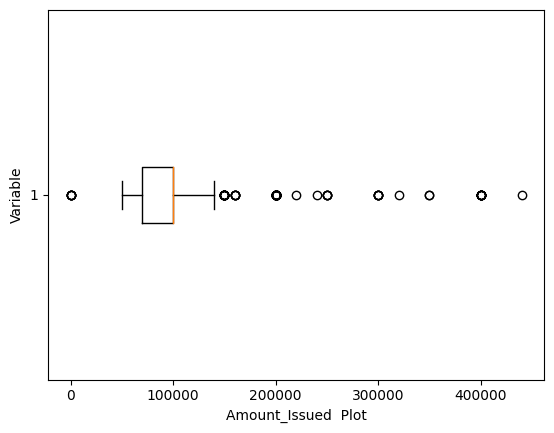

In [ ]:
plt.boxplot(dataset2['Amount_Issued'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Amount_Issued  Plot')
plt.show()

In [24]:
# calculate summary statistics
mean = dataset2['Amount_Issued'].mean()
std  = dataset2['Amount_Issued'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)


Lower Bound : -17904.905153581814
Upper Bound : 223898.6194392961


In [25]:
dataset2['Sector'].unique()

array(['Agriculture', 'Other', 'Trade', 'Service', 'Manufacturing', ' '],
      dtype=object)

<Axes: >

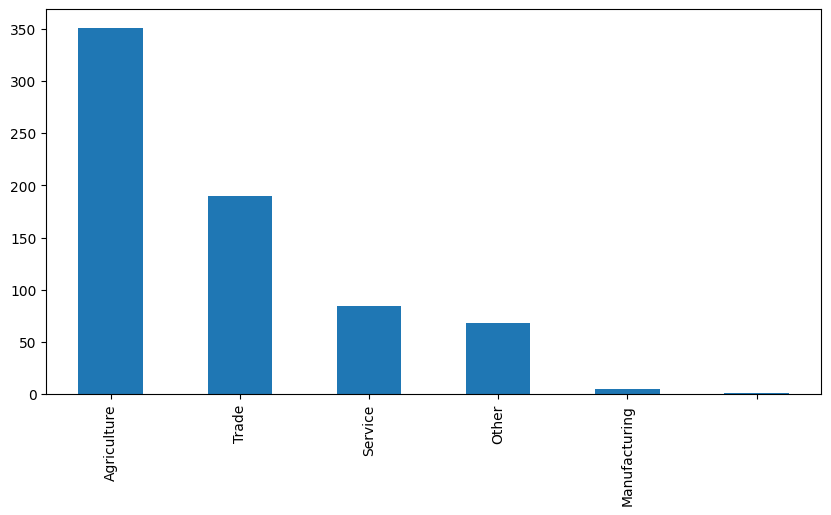

In [26]:
plt.figure(figsize=(10,5))
dataset2['Sector'].value_counts().plot(kind='bar')

<Axes: >

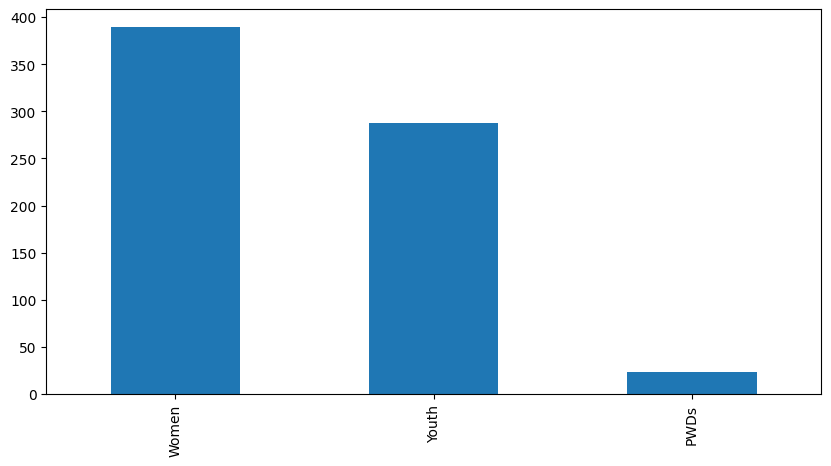

In [27]:
plt.figure(figsize=(10,5))
dataset2['Category'].value_counts().plot(kind='bar')

<ipython-input-28-cad2aa51606f>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


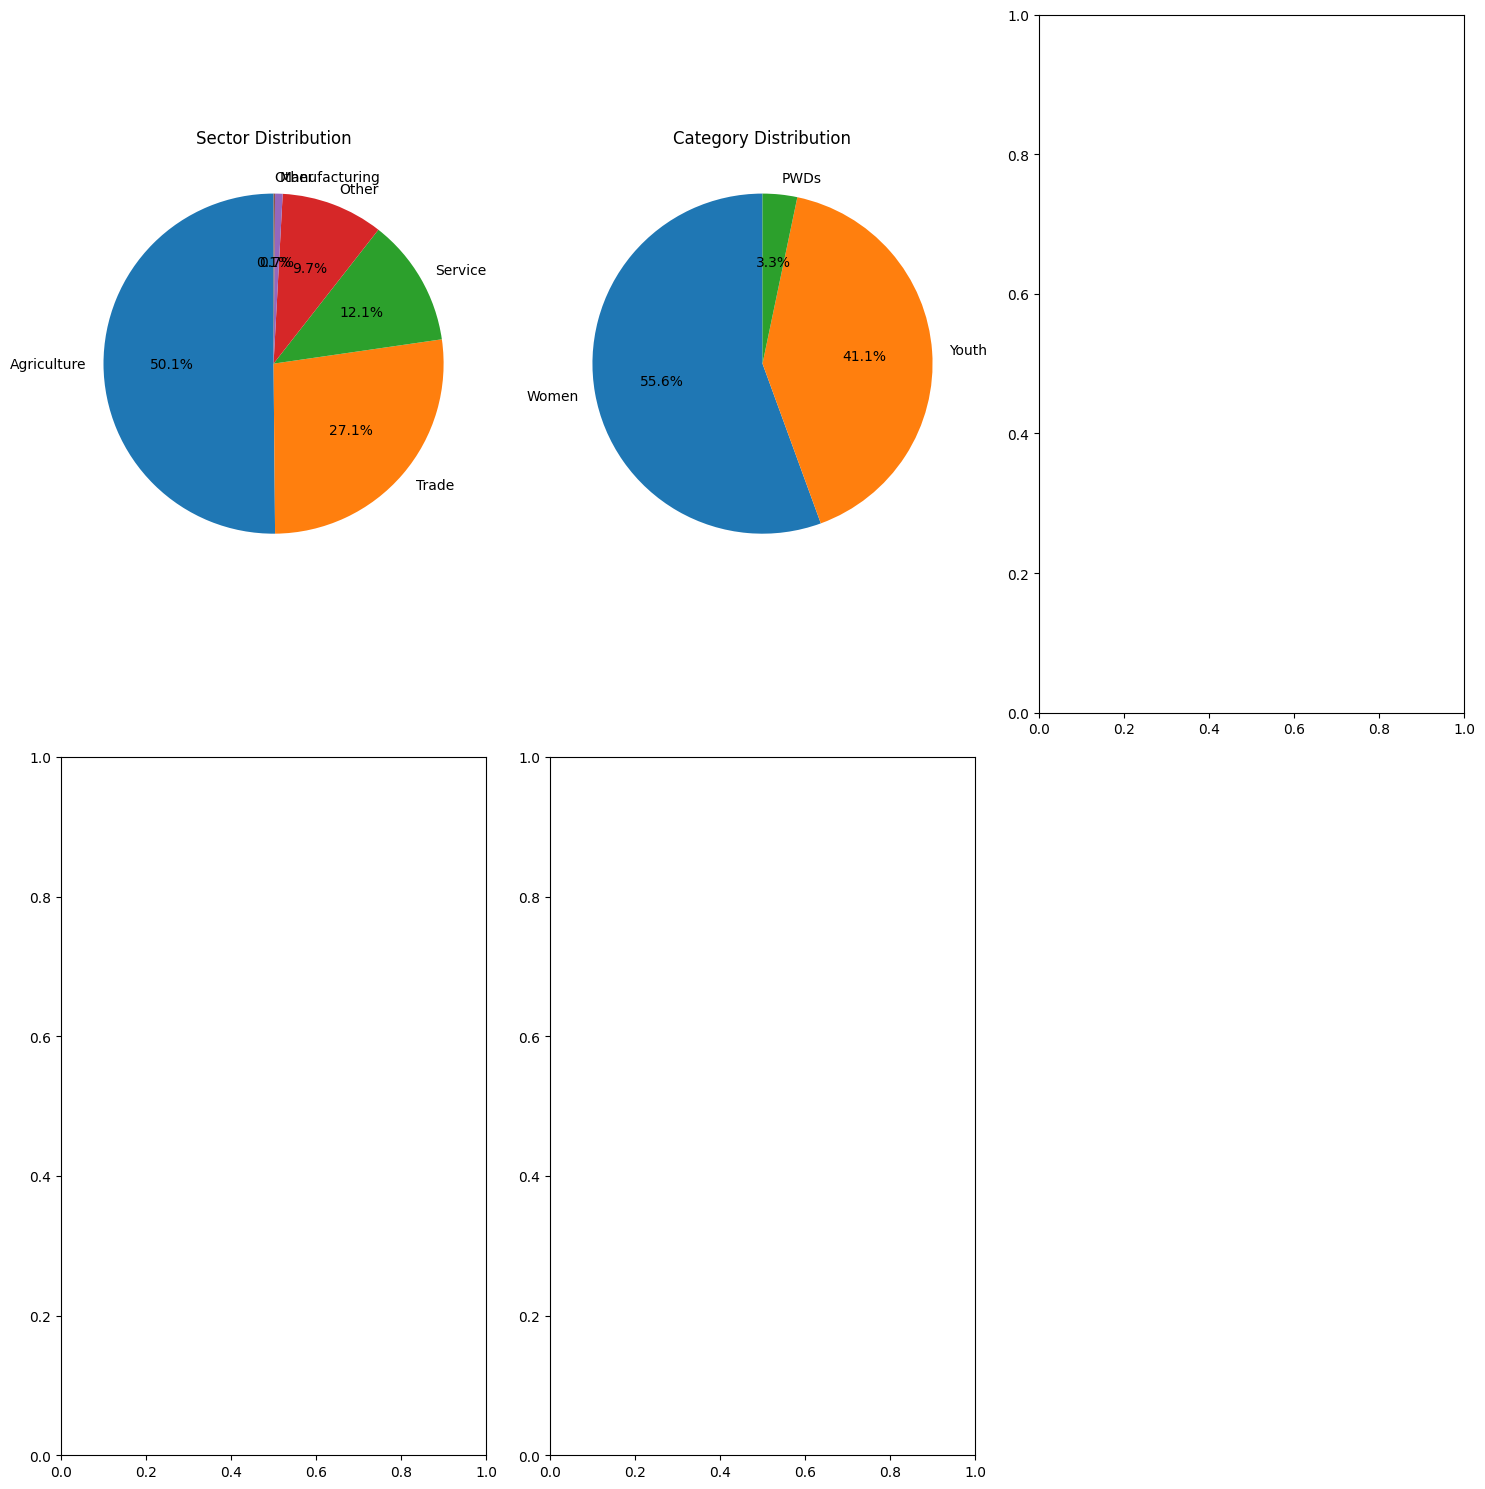

In [28]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Sector', 'Category']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = dataset2[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove sixth plot
fig.delaxes(axs[1][2])

# Show the plot
plt.show()

**Calculating** **Credit** **Scores**

The dataset doesn’t have any feature representing the credit scores of individuals. To calculate the credit scores, we are going to use  FICO score, a commonly used credit scoring model in the industry.

Below is how we can implement the FICO score method to calculate credit scores:

In [29]:
s = (dataset2.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sector', 'Category', 'Existing_Loans', 'Table_Banking']


In [30]:
# Define the mapping for categorical features
sector_mapping = {' ': 0, 'Other': 1,'Manufacturing' : 2, 'Service': 3,  'Trade': 4,'Agriculture': 5}
category_mapping = {'PWDs': 1, 'Youth': 2, 'Women': 3}
existing_Loans_mapping = {'No': 0, 'Yes': 1}
table_Banking_mapping = {'No': 0, 'Yes': 1}
# Apply mapping to categorical features
dataset2['Sector'] = dataset2['Sector'].map(sector_mapping )
dataset2['Category'] = dataset2['Category'].map(category_mapping)
dataset2['Existing_Loans'] = dataset2['Existing_Loans'].map(existing_Loans_mapping)
dataset2['Table_Banking'] = dataset2['Table_Banking'].map(table_Banking_mapping)

print (dataset2)

      Group_Age_In_Years  Group_Location  Sector  Category  \
2                    9.0           179.0       5         2   
5                    9.0           179.0       5         3   
7                    9.0           179.0       5         3   
8                    9.0           179.0       5         2   
9                    9.0           179.0       5         3   
...                  ...             ...     ...       ...   
1016                 0.0           178.0       4         3   
1017                 0.0           178.0       4         2   
1018                 0.0           178.0       4         3   
1019                 0.0           178.0       5         3   
1020                 0.0           178.0       4         3   

      Repayment_Period_In_Years  Existing_Loans  Table_Banking  Amount_Issued  \
2                           2.0               1              1        50000.0   
5                           2.0               1              0       200000.0   
7           

In [32]:
# Calculate credit scores using the complete FICO formula
credit_scores = []
for index, row in dataset2.iterrows():
      Amount_Repaid = row['Amount_Repaid']
      Amount_cummulatively_in_arrears= row['Amount_cummulatively_in_arrears']
      Repayment_Period_In_Years = row['Repayment_Period_In_Years']
      Sector= row['Sector']
      Category= row['Category']

    # Apply the FICO formula to calculate the credit score
      credit_score = (Amount_Repaid * 0.35) + (Amount_cummulatively_in_arrears * 0.30) + ( Repayment_Period_In_Years* 0.15) + (Sector* 0.10) + (Category * 0.10)
      credit_scores.append(credit_score)

# Add the credit scores as a new column to the dataset2
dataset2['Credit Score'] = credit_scores

print(dataset2.head())

   Group_Age_In_Years  Group_Location  Sector  Category  \
2                 9.0           179.0       5         2   
5                 9.0           179.0       5         3   
7                 9.0           179.0       5         3   
8                 9.0           179.0       5         2   
9                 9.0           179.0       5         3   

   Repayment_Period_In_Years  Existing_Loans  Table_Banking  Amount_Issued  \
2                        2.0               1              1        50000.0   
5                        2.0               1              0       200000.0   
7                        2.0               1              1       100000.0   
8                        2.0               1              1       350000.0   
9                        2.0               1              1       100000.0   

     Amount_Due  Amount_Repaid  Amount_cummulatively_in_arrears  \
2   4166.666667        27045.0                    -22878.333333   
5  16666.666667            0.0            

**Segmentation Based on Credit Scores**

In [36]:
from sklearn.cluster import KMeans

X = dataset2[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
dataset2['Segment'] = kmeans.labels_

 **Segments**:

In [37]:
# Convert the 'Segment' column to category data type
dataset2['Segment'] = dataset2['Segment'].astype('category')

# Visualize the segments using Plotly
import plotly.express as px
fig = px.scatter(dataset2, x=dataset2.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

In [38]:
dataset2['Segment'] = dataset2['Segment'].map({2: 'Very Low',
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})

# Convert the 'Segment' column to category data type
dataset2['Segment'] = dataset2['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(dataset2, x=dataset2.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

**Exploratory** **Data** **Analysis**

Summary Statistics

In [41]:
dataset2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Group_Age_In_Years,700.0,7.114286,5.069031,0.000000,5.000,8.000000,9.000,124.0
Group_Location,700.0,184.455714,8.005330,177.000000,178.000,179.000000,194.000,194.0
Sector,700.0,4.068571,1.243414,0.000000,4.000,5.000000,5.000,5.0
Category,700.0,2.522857,0.561821,1.000000,2.000,3.000000,3.000,3.0
Repayment_Period_In_Years,700.0,2.658571,4.585135,0.000000,2.000,2.000000,2.000,117.0
Existing_Loans,700.0,0.877143,0.328508,0.000000,1.000,1.000000,1.000,1.0
Table_Banking,700.0,0.817143,0.386826,0.000000,1.000,1.000000,1.000,1.0
Amount_Issued,700.0,102996.857143,60450.881148,0.000000,70000.000,100000.000000,100000.000,440000.0
Amount_Due,700.0,10201.479048,18250.682855,0.000000,5000.000,8333.333333,12500.000,455325.0
Amount_Repaid,700.0,35757.284286,47978.359819,0.000000,5000.000,19772.500000,47150.000,400000.0


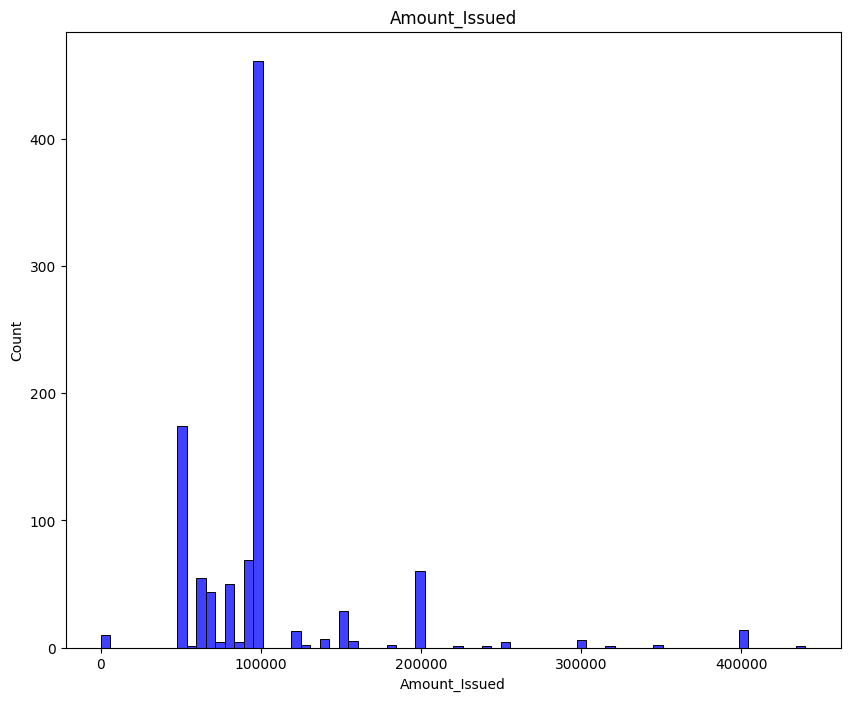

In [42]:
# Plotting distribution of Credit amount feature
plt.figure(figsize=(10,8), )
plt.title('Amount_Issued')
sns.histplot(dataset['Amount_Issued'], color='blue')

# Save the plot as PNG file
plt.savefig('Amount_Issued_distribution.png');

Segment
Low           69
Good         227
Very Low      14
Excellent    390
dtype: int64


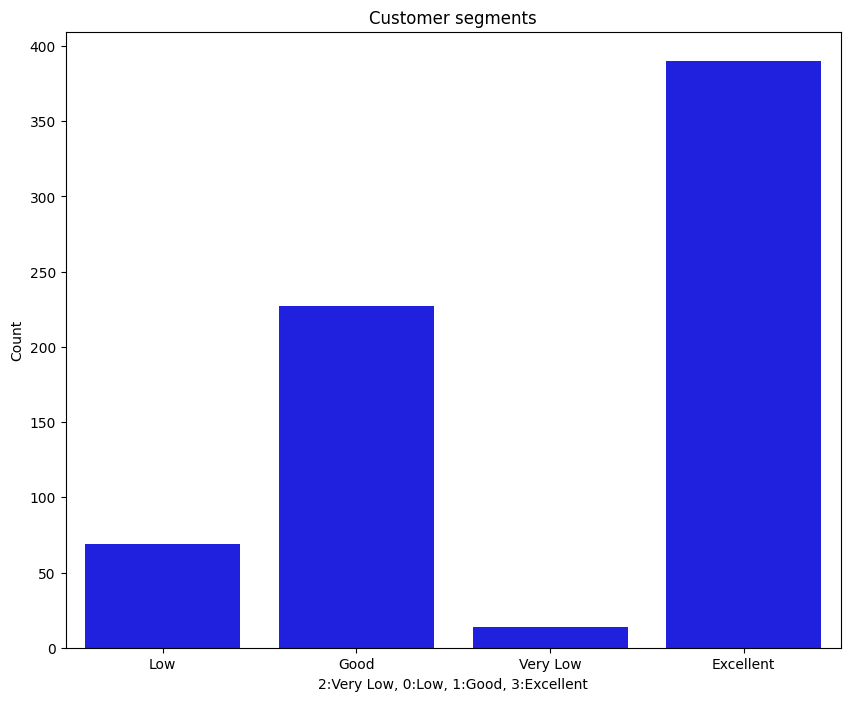

In [44]:
print (dataset2.groupby("Segment").size())
plt.figure(figsize=(10,8))
sns.barplot(x=dataset2['Segment'].value_counts().index, y=dataset2['Segment'].value_counts(), color='blue')
plt.title('Customer segments')
plt.ylabel('Count')
plt.xlabel('2:Very Low, 0:Low, 1:Good, 3:Excellent')

# Save the plot as PNG file
plt.savefig('Good_vs_Bad _Credit.png');

Data Visualization

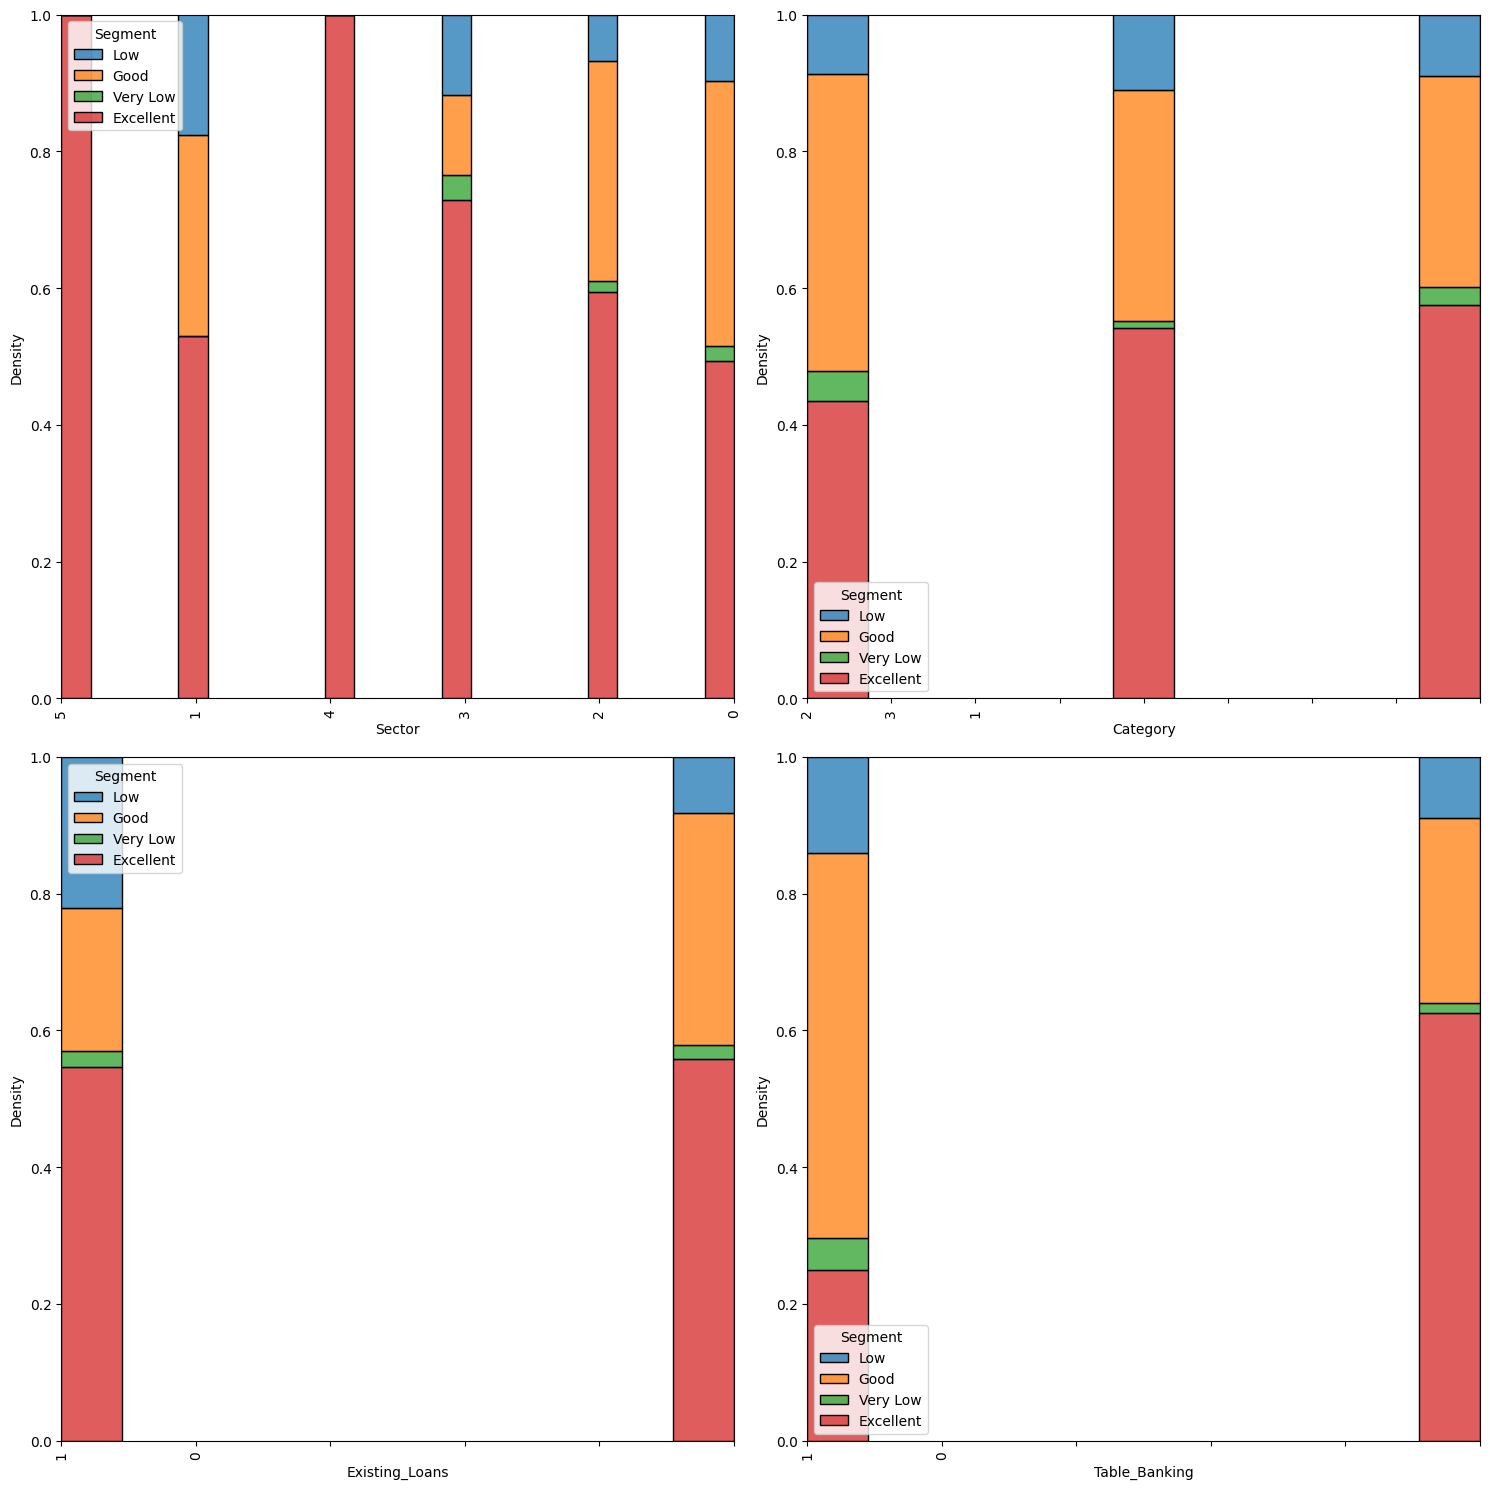

In [46]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Sector', 'Category','Existing_Loans','Table_Banking']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Segment', data=dataset2, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(dataset2[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

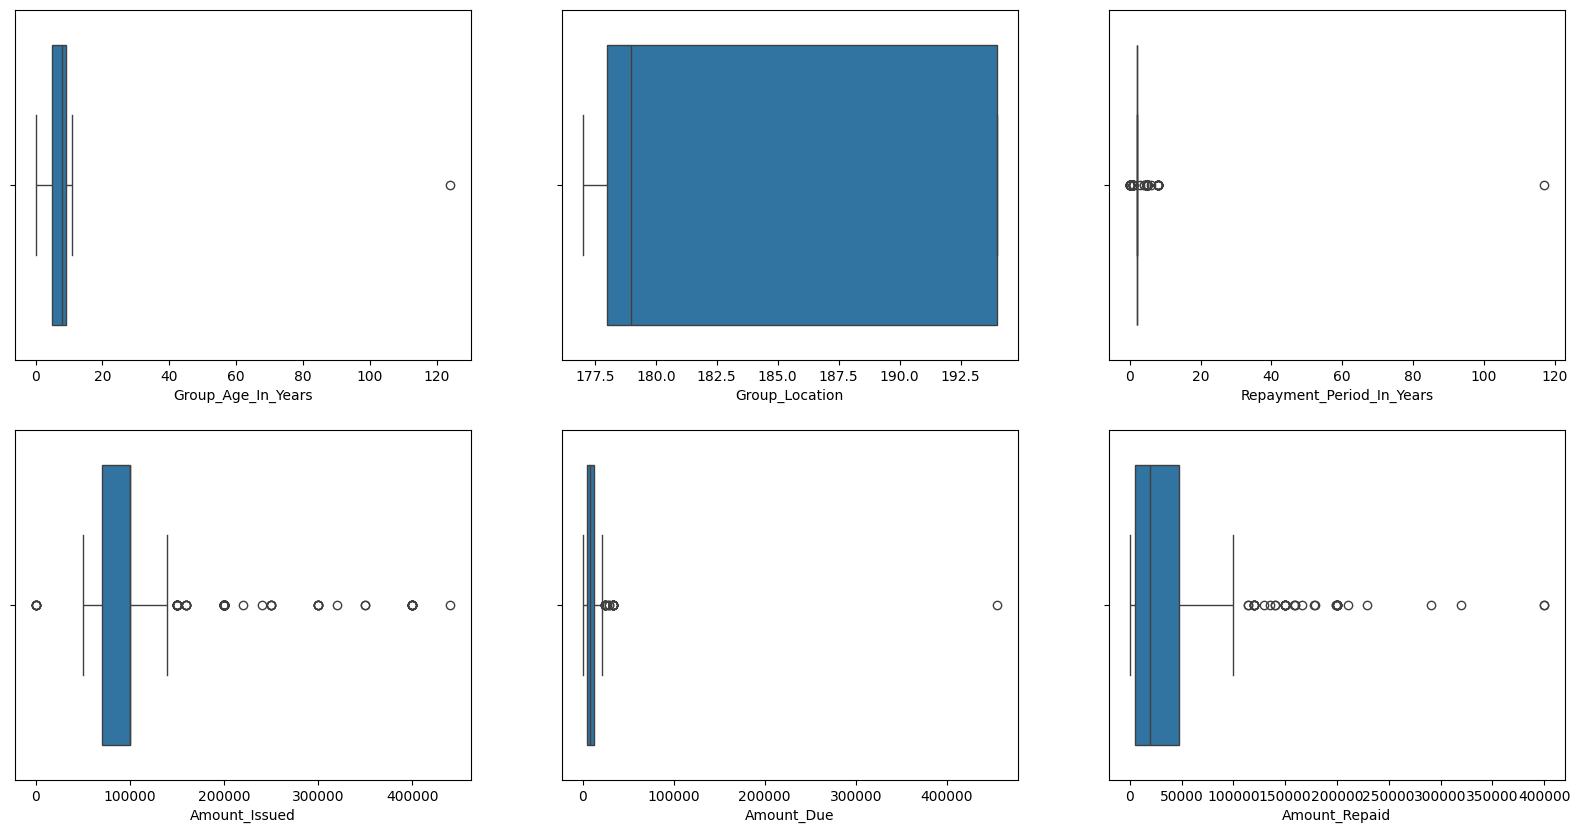

In [52]:
# list of numerical variables to plot
num_vars = ['Group_Age_In_Years','Group_Location','Repayment_Period_In_Years','Amount_Issued','Amount_Due','Amount_Repaid','Amount_cummulatively_in_arrears','Outstanding_Loan_Balance','Credit Score']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=dataset2, ax=axs[i])

fig.tight_layout()

plt.show()

<Axes: >

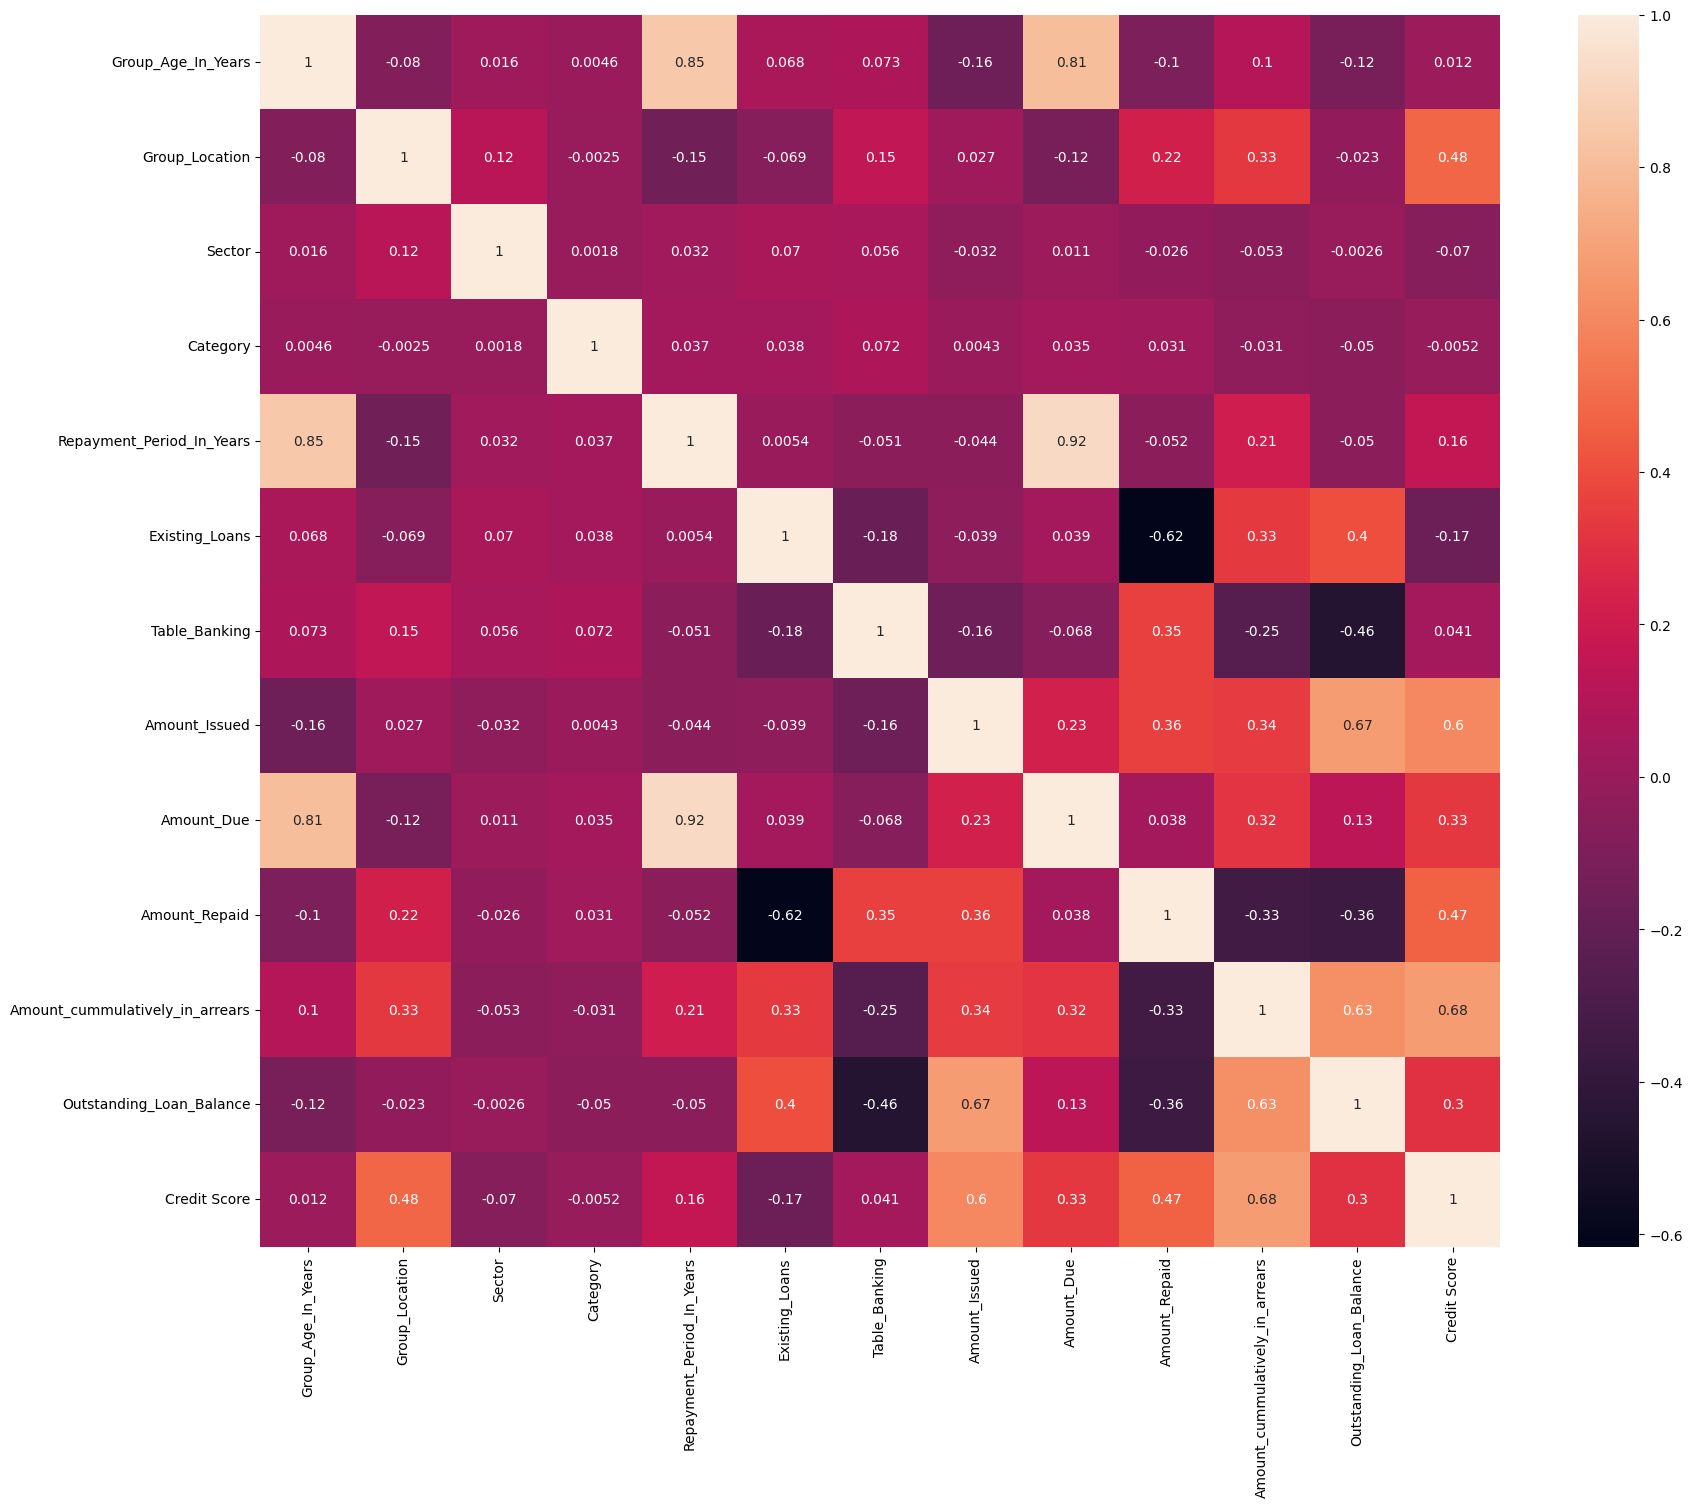

In [53]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(dataset2.corr(), fmt='.2g', annot=True)

# **2. MODELLING**

In [54]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 2 to 1020
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Group_Age_In_Years               700 non-null    float64 
 1   Group_Location                   700 non-null    float64 
 2   Sector                           700 non-null    int64   
 3   Category                         700 non-null    int64   
 4   Repayment_Period_In_Years        700 non-null    float64 
 5   Existing_Loans                   700 non-null    int64   
 6   Table_Banking                    700 non-null    int64   
 7   Amount_Issued                    700 non-null    float64 
 8   Amount_Due                       700 non-null    float64 
 9   Amount_Repaid                    700 non-null    float64 
 10  Amount_cummulatively_in_arrears  700 non-null    float64 
 11  Outstanding_Loan_Balance         700 non-null    float64 
 12  Credit 

In [55]:
# Print the class distribution of the target variable
print(dataset2['Segment'].value_counts())

Excellent    390
Good         227
Low           69
Very Low      14
Name: Segment, dtype: int64


In [56]:
# Drop the 'Segment' column to prepare data for splitting
data = dataset2.drop(columns=['Segment'])
# Get the target variable
answer = dataset2['Segment']


In [57]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
from sklearn.model_selection import train_test_split
#split into train_validate_test sets
#train size 70%, validate size 10% and test size 20%
train_ratio = 0.70
test_ratio = 0.20
validation_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=test_ratio, stratify=dataset2['Segment'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), stratify=y_train)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(497, 13)
(63, 13)
(140, 13)
(497,)
(63,)
(140,)


In [58]:
print(X_train.head())

     Group_Age_In_Years  Group_Location  Sector  Category  \
335                 9.0           177.0       1         3   
222                 9.0           178.0       5         2   
49                  9.0           179.0       5         2   
939                 3.0           194.0       5         3   
556                 8.0           194.0       4         2   

     Repayment_Period_In_Years  Existing_Loans  Table_Banking  Amount_Issued  \
335                        2.0               1              1       150000.0   
222                        8.0               0              1        93400.0   
49                         2.0               1              0       300000.0   
939                        2.0               1              1       400000.0   
556                        2.0               1              1        50000.0   

       Amount_Due  Amount_Repaid  Amount_cummulatively_in_arrears  \
335  12500.000000         4500.0                         141000.0   
222      8.000

 **Feature** **Scaling**

In [59]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train

array([[ 0.81915754, -0.95592428, -2.49797699, ...,  1.69368579,
         1.32009743,  1.01795504],
       [ 0.81915754, -0.83109654,  0.76267846, ..., -0.50561673,
        -1.05777079,  0.48501042],
       [ 0.81915754, -0.7062688 ,  0.76267846, ..., -0.11577214,
         3.84505027, -0.71579035],
       ...,
       [ 0.81915754, -0.7062688 ,  0.76267846, ..., -1.89585238,
        -1.01609681, -0.72186744],
       [-0.77116002, -0.95592428, -2.49797699, ...,  1.054136  ,
         0.5765029 ,  0.35661926],
       [ 0.42157815, -0.95592428, -0.0524854 , ...,  0.19542342,
        -0.32316476,  0.15420431]])

# **Logistic** **Regression**

In [104]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr').fit(X_train, y_train) #train the model

In [98]:
y_pred = model.predict(X_test)
y_pred

array(['Excellent', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Excellent', 'Good', 'Good', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Good', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Good',
       'Excellent', 'Excellent', 'Low', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Good', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Very Low',
       'Excellent', 'Good', 'Excellent', 'Good', 'Low', 'Excellent',
       'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Good', 'Excellent', 'Low',
       'Excellent', 'Good', 'Low', 'Good', 'Good', 'Excellent', 'Good',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Go

In [102]:
y_test

636    Excellent
955          Low
437    Excellent
858         Good
217         Good
         ...    
406    Excellent
178         Good
819         Good
524    Excellent
298         Good
Name: Segment, Length: 140, dtype: category
Categories (4, object): ['Low', 'Good', 'Very Low', 'Excellent']

# **Model** **Evaluation**

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  0  1  0]
 [ 0 45  0  0]
 [ 4  0 10  0]
 [ 1  0  0  2]]
              precision    recall  f1-score   support

   Excellent       0.94      0.99      0.96        78
        Good       1.00      1.00      1.00        45
         Low       0.91      0.71      0.80        14
    Very Low       1.00      0.67      0.80         3

    accuracy                           0.96       140
   macro avg       0.96      0.84      0.89       140
weighted avg       0.96      0.96      0.95       140



In [103]:
from sklearn.metrics import recall_score
# Option 1: Calculate recall for each class separately
tpr = recall_score(y_test, y_pred, average=None)
tnr = recall_score(y_test, y_pred, pos_label=0, average=None)
fpr = 1 - tnr
fnr = 1 - tpr
fpr

array([0.01282051, 0.        , 0.28571429, 0.33333333])

 **Logistic Regression feature importance**

Feature: 0, Score: 0.39274
Feature: 1, Score: 1.58383
Feature: 2, Score: -0.47206
Feature: 3, Score: 0.12101
Feature: 4, Score: 0.71534
Feature: 5, Score: -0.15243
Feature: 6, Score: 0.39891
Feature: 7, Score: 0.21975
Feature: 8, Score: 0.94211
Feature: 9, Score: -1.11689
Feature: 10, Score: 0.75522
Feature: 11, Score: -1.85219
Feature: 12, Score: -0.20532


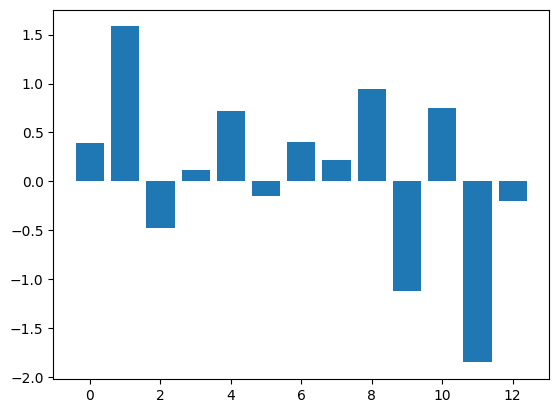

In [99]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

 **Learning curve for logistic regression**


In [100]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(model, data, answer, train_sizes=[150, 300, 560 ])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


150 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.82
300 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.89
560 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.92


**Artificial** **Neural** **Network**

In [72]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['Excellent', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Low', 'Good', 'Good', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Good', 'Low', 'Excellent',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Excellent', 'Low', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Excellent', 'Low', 'Good', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Low', 'Excellent', 'Good',
       'Excellent', 'Good', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Good', 'Excellent', 'Low', 'Excellent', 'Good', 'Low', 'Good',
       'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Good', 'Excellent', 'Good',
    

In [73]:
y_test

636    Excellent
955          Low
437    Excellent
858         Good
217         Good
         ...    
406    Excellent
178         Good
819         Good
524    Excellent
298         Good
Name: Segment, Length: 140, dtype: category
Categories (4, object): ['Low', 'Good', 'Very Low', 'Excellent']

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  1  2  0]
 [ 0 45  0  0]
 [ 1  0 13  0]
 [ 1  0  2  0]]
              precision    recall  f1-score   support

   Excellent       0.97      0.96      0.97        78
        Good       0.98      1.00      0.99        45
         Low       0.76      0.93      0.84        14
    Very Low       0.00      0.00      0.00         3

    accuracy                           0.95       140
   macro avg       0.68      0.72      0.70       140
weighted avg       0.93      0.95      0.94       140



In [78]:
from sklearn.metrics import recall_score
# Option 1: Calculate recall for each class separately
tpr = recall_score(y_test, y_pred, average=None)
tnr = recall_score(y_test, y_pred, pos_label=0, average=None)
fpr = 1 - tnr
fnr = 1 - tpr
fpr

array([0.03846154, 0.        , 0.07142857, 1.        ])

In [79]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(clf, data, answer, train_sizes=[150, 300, 560])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

150 samples were used to train the model
The average train accuracy is 0.18
The average test accuracy is 0.16
300 samples were used to train the model
The average train accuracy is 0.52
The average test accuracy is 0.41
560 samples were used to train the model
The average train accuracy is 0.32
The average test accuracy is 0.32


**Support** **Vector** **Machine**

In [80]:
from sklearn import svm
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train)

SVC()

In [81]:
y_pred = clf2.predict(X_test)
y_pred

array(['Excellent', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Low', 'Good', 'Good', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Good', 'Low', 'Excellent',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Excellent', 'Low', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Excellent', 'Low', 'Good', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Very Low', 'Excellent',
       'Good', 'Excellent', 'Good', 'Low', 'Excellent', 'Good', 'Good',
       'Good', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Low', 'Excellent', 'Good',
       'Low', 'Good', 'Good', 'Excellent', 'Good', 'Excellent',
       'Excellent', 'Good', 'Excellent', 'Good', 'Excellent', 'Good',
       'Excellent', 

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76  0  2  0]
 [ 0 45  0  0]
 [ 1  0 13  0]
 [ 1  0  0  2]]
              precision    recall  f1-score   support

   Excellent       0.97      0.97      0.97        78
        Good       1.00      1.00      1.00        45
         Low       0.87      0.93      0.90        14
    Very Low       1.00      0.67      0.80         3

    accuracy                           0.97       140
   macro avg       0.96      0.89      0.92       140
weighted avg       0.97      0.97      0.97       140



In [84]:
from sklearn.metrics import recall_score
# Option 1: Calculate recall for each class separately
tpr = recall_score(y_test, y_pred, average=None)
tnr = recall_score(y_test, y_pred, pos_label=0, average=None)
fpr = 1 - tnr
fnr = 1 - tpr
fpr

array([0.02564103, 0.        , 0.07142857, 0.33333333])

In [85]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(clf2, data, answer, train_sizes=[150,300,560])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

150 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.87
300 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.91
560 samples were used to train the model
The average train accuracy is 0.98
The average test accuracy is 0.97


**Random** **Forest**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [88]:
y_pred = rfc.predict(X_test)
y_pred

array(['Excellent', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Low', 'Good', 'Good', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Very Low', 'Good', 'Low', 'Excellent',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Excellent', 'Low', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Excellent', 'Low', 'Good', 'Excellent',
       'Excellent', 'Excellent', 'Low', 'Very Low', 'Excellent', 'Good',
       'Excellent', 'Good', 'Low', 'Excellent', 'Good', 'Good', 'Good',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent',
       'Good', 'Excellent', 'Low', 'Excellent', 'Good', 'Low', 'Good',
       'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Good', 'Excellent', 'Good',
      

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  0  0  0]
 [ 0 45  0  0]
 [ 0  0 14  0]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00        78
        Good       1.00      1.00      1.00        45
         Low       1.00      1.00      1.00        14
    Very Low       1.00      1.00      1.00         3

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [94]:
from sklearn.metrics import recall_score
# Option 1: Calculate recall for each class separately
tpr = recall_score(y_test, y_pred, average=None)
tnr = recall_score(y_test, y_pred, pos_label=0, average=None)
fpr = 1 - tnr
fnr = 1 - tpr
fnr

array([0., 0., 0., 0.])

**Learning** **Curve**

In [91]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(rfc, data, answer, train_sizes=[150,300,560])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


150 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.78
300 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.91
560 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.98


**Detection** **error** **tradeoff** (**DET**) **curve**

ValueError: Expected 'estimator' to be a binary classifier, but got LogisticRegression fit on multiclass (4 classes) data

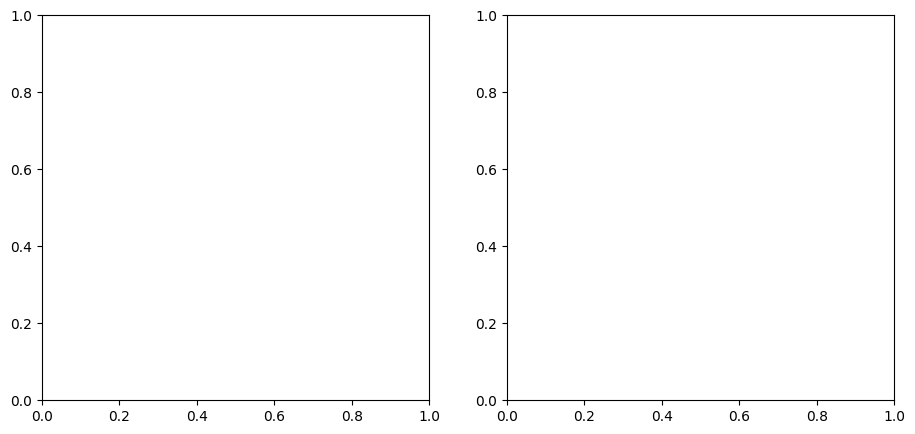

In [105]:
#Define the classifiers
classifiers = {
   "LR":LogisticRegression(multi_class='ovr'),
   "ANN": MLPClassifier(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1),
    "SVM": svm.SVC(kernel='rbf'),
  "Random Forest": RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')
    ,
}
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Plot curves for in-sample data
    RocCurveDisplay.from_estimator(clf, X_valid, y_valid, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_valid, y_valid, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [95]:

# Write the DataFrame to a CSV file
data.to_csv('uwezo1.csv', index=False)
from IPython.display import HTML
HTML('Download CSV file')
